In [11]:
import pandas as pd
import yfinance as yf
import pandas_ta as ta
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [12]:
def generate_train_test_datasets_yf(ticker, train_test_split, save_csv=False):
    """
    Return Train/Test Splits from specific ticker from YFinance!.
    """

    yf_ticker = yf.Ticker(ticker=f'{ticker}.SA')

    df = yf_ticker.history(period='2y', interval='1h')
    df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
    df["Volume"] = df["Volume"].fillna(0).astype(int)
    df.ta.log_return(append=True, length=16)
    df.ta.rsi(append=True, length=14)
    df.ta.macd(append=True, fast=12, slow=26)
    df.dropna(inplace=True)

    next_day = datetime.strptime(train_test_split, '%Y-%m-%d')
    next_day = next_day + timedelta(days=1)
    next_day = next_day.strftime('%Y-%m-%d')

    df_training = df.loc[:train_test_split].copy()
    df_evaluation = df.loc[next_day:].copy()

    if save_csv:
        df_training.dropna().to_csv('training.csv', index=True)
        df_evaluation.dropna().to_csv('evaluation.csv', index=True)

    return df_training, df_evaluation

In [13]:
ticker = 'B3SA3'
train_test_split = '2022-01-01'
df_train, df_test = generate_train_test_datasets_yf(ticker, train_test_split)

In [14]:
df_train.tail()

,Open,High,Low,Close,Volume,LOGRET_16,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
2021-08-31 12:00:00-03:00,17.000000,17.080000,16.950001,16.980000,1257400,-0.002940,40.058057,-0.056426,-0.001623,-0.054803
2021-08-31 13:00:00-03:00,16.980000,17.010000,16.840000,16.870001,1498500,-0.008264,34.981548,-0.068353,-0.010840,-0.057513
2021-08-31 14:00:00-03:00,16.870001,16.889999,16.809999,16.870001,3059500,-0.004141,34.981548,-0.076919,-0.015525,-0.061394
2021-08-31 15:00:00-03:00,16.879999,16.920000,16.840000,16.879999,2627300,-0.011779,35.838699,-0.081955,-0.016449,-0.065506
2021-08-31 16:00:00-03:00,16.879999,17.020000,16.860001,16.950001,3155000,-0.005882,41.639710,-0.079383,-0.011102,-0.068282


In [15]:
df_test.head()

,Open,High,Low,Close,Volume,LOGRET_16,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
2021-09-01 10:00:00-03:00,17.160000,17.320000,17.040001,17.240000,0,0.016375,58.414185,-0.053330,0.011962,-0.065291
2021-09-01 11:00:00-03:00,17.240000,17.379999,17.170000,17.190001,3025800,0.011703,55.454666,-0.036298,0.023195,-0.059493
2021-09-01 12:00:00-03:00,17.190001,17.209999,17.070000,17.150000,3096300,0.008785,53.135260,-0.025732,0.027009,-0.052740
2021-09-01 13:00:00-03:00,17.139999,17.280001,17.139999,17.219999,2409500,0.004657,56.559356,-0.011576,0.032932,-0.044508
2021-09-01 14:00:00-03:00,17.209999,17.360001,17.190001,17.270000,1150500,0.007556,58.870977,0.003636,0.038515,-0.034879


#### RSI Indicator

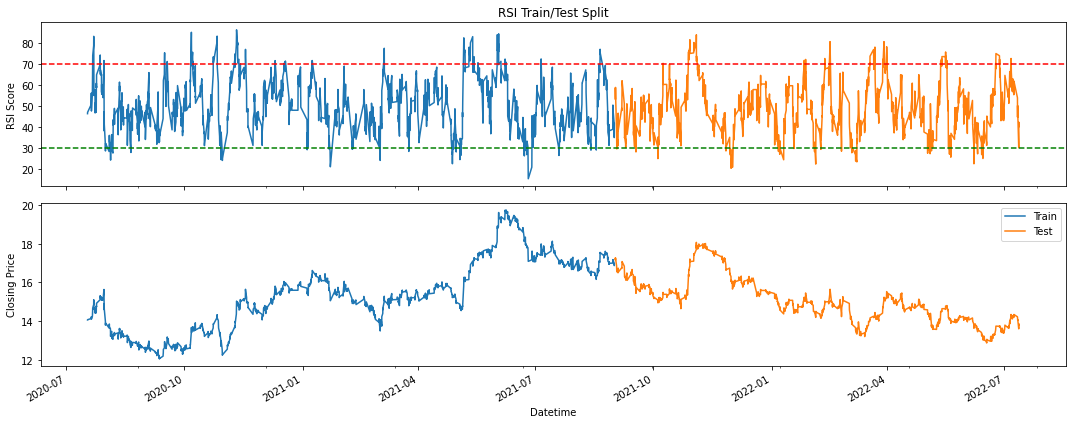

In [16]:
fig, ax = plt.subplots(2, figsize=(15,6), sharex=True)

df_train.RSI_14.plot(ax=ax[0])
df_test.RSI_14.plot(ax=ax[0])
ax[0].set_title('RSI Train/Test Split')

ax[0].set_ylabel('RSI Score')
ax[0].axhline(70, color='red', linestyle="dashed")
ax[0].axhline(30, color='green', linestyle="dashed")

df_train.Close.plot(ax=ax[1])
df_test.Close.plot(ax=ax[1])
ax[1].set_ylabel('Closing Price')
ax[1].set_xlabel('Datetime')

plt.legend(['Train', 'Test'])

plt.tight_layout();